In [1]:
import pandas as pd
import numpy as np

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv")

In [3]:
raw_csv_data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [4]:
df_comp = raw_csv_data.copy()

In [5]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [6]:
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [7]:
df_comp['dax'].isna().sum()

0

In [8]:
df_comp.dax.isna().sum()

0

In [9]:
import matplotlib.pyplot as plt

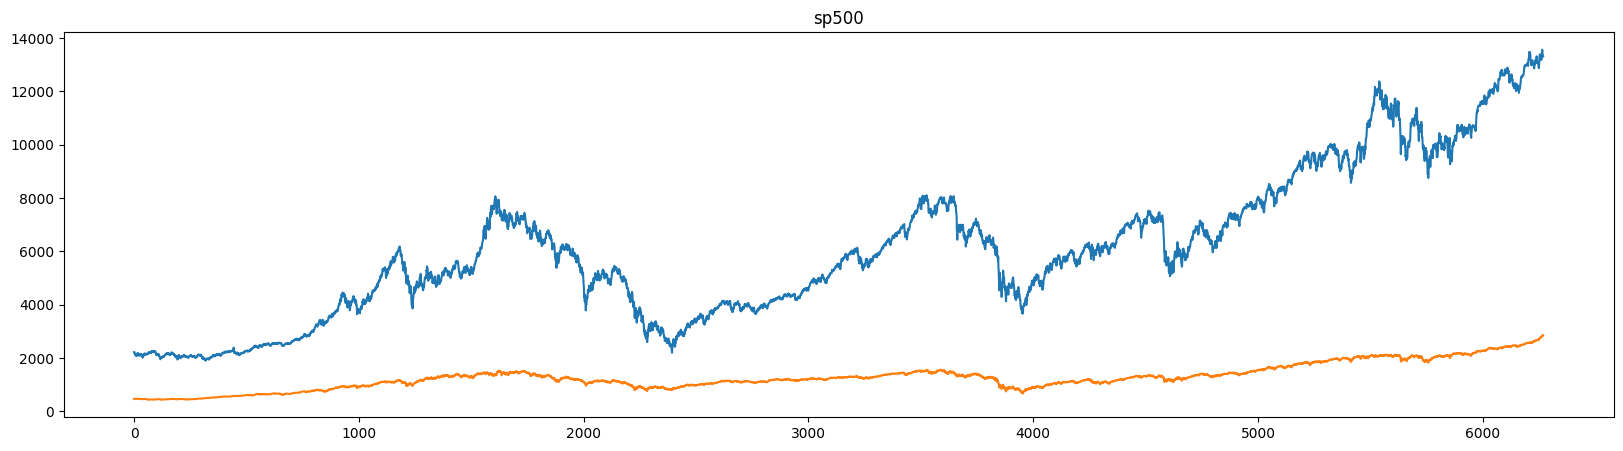

In [10]:
df_comp.dax.plot(figsize=(20,5), title = "dax")
df_comp.spx.plot(figsize=(20,5), title = "sp500")
plt.show()

QQ plot
(pip install scipy)

In [11]:
import scipy.stats
import pylab

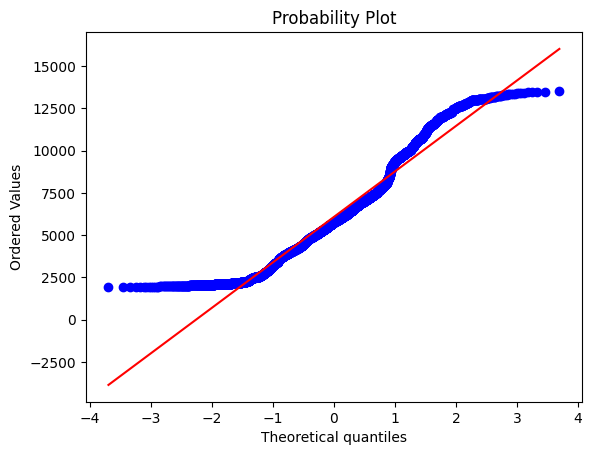

In [12]:
scipy.stats.probplot(df_comp.dax, plot = pylab)
pylab.show()

In [13]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)

In [14]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [15]:
df_comp.date.describe()

count                             6269
mean     2006-01-14 19:36:59.492742144
min                1994-01-07 00:00:00
25%                2000-01-11 00:00:00
50%                2006-01-12 00:00:00
75%                2012-01-19 00:00:00
max                2018-01-29 00:00:00
Name: date, dtype: object

In [16]:
df_comp.set_index("date", inplace = True)

In [17]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [18]:
df_comp = df_comp.asfreq('b')

In [19]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [20]:
df_comp['spx'] = df_comp['spx'].ffill()

In [ ]:
# df_comp.spx = df_comp.spx.ffill(), dont work fine, changes all 4 columns
# this is deprecated: df_comp.spx = df_comp.spx.fillna(method = "ffill")

In [21]:
df_comp.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [22]:
df_comp['dax'] = df_comp['dax'].bfill()

In [23]:
df_comp.isna().sum()

spx       0
dax       0
ftse      8
nikkei    8
dtype: int64

In [25]:
df_comp['ftse'] = df_comp['ftse'].fillna(df_comp['ftse'].mean())

In [26]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [27]:
df_comp['nikkei'] = df_comp['nikkei'].ffill()

In [28]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [29]:
df_comp['market_value'] = df_comp['spx']

In [30]:
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6083.317840,5422.713545,14597.672753,1288.642547
std,487.868210,2755.380039,1144.842066,4043.795272,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10701.130000,992.715221
50%,1233.761241,5774.260000,5661.880000,15030.510000,1233.761241
75%,1460.250000,7445.560000,6303.300000,17860.470000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [31]:
del df_comp['spx'], df_comp['nikkei'], df_comp['ftse'], df_comp['dax']

In [32]:
df_comp.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


In [33]:
size = int(len(df_comp))

In [34]:
df = df_comp.iloc[:size]

In [35]:
df_test = df_comp.iloc[size:]